In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
from keras.models import load_model

pretrained_model = load_model("MobileNetV3Large.keras")

/Users/vpedos/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

from tensorflow.keras.applications import MobileNetV3Large
from keras.layers import Conv2D , MaxPool2D , Input , GlobalAveragePooling2D ,AveragePooling2D, Dense , Dropout ,Activation, Flatten , BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint



from tensorflow.keras import Model



In [5]:
TRAIN_DIR = './Apple2.0/train'
TEST_DIR = './Apple2.0/test'

train_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

test_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [6]:
# Split the data into three categories.
train_images = train_generator.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42
)

test_images = test_generator.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

Found 2306 images belonging to 4 classes.
Found 500 images belonging to 4 classes.


In [7]:
# Resize Layer
resize_and_rescale = keras.Sequential([
  layers.Resizing(224,224),
  layers.Rescaling(1./255),
])

# Setup data augmentation
data_augmentation = keras.Sequential([
  layers.RandomHeight(0.03),
  layers.RandomWidth(0.03),                       
], name="data_augmentation")

In [8]:
print(len(train_images))

37


In [9]:
# Load the pretained model

pretrained_model.trainable = False

In [10]:
# Build model walnut right
inputs = pretrained_model.input
x = resize_and_rescale(inputs)


x = Dense(512, activation='relu')(pretrained_model.output)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(32, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 112, 112,  │        432 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 112, 112,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        144 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        256 │ re_lu[0][0]       │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 112, 112,  │          0 │ activation[0][0], │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 112, 112,  │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 113, 113,  │          0 │ re_lu_1[0][0]     │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        256 │ expanded_conv_1_

 Total params: 3,558,308 (13.57 MB)

 Trainable params: 561,956 (2.14 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

In [12]:
# Create checkpoint callback
checkpoint_path = "./AppleCNN-Model/Checkpoint/model_apple.keras"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=False,
                                      monitor="val_accuracy",
                                      save_best_only=True)


# Create callback to visualize data
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='./AppleCNN-Model/Graph', 
                                             histogram_freq=1, write_graph=True, 
                                             write_images=True, embeddings_freq=1)

In [13]:
# Train the model
history = model.fit(
    train_images,
    validation_data=test_images,
    epochs=40,
    callbacks=[
        EarlyStopping(patience = 3),
        tb_callback,
        checkpoint_callback,
    ]
)

Epoch 1/40


/Users/vpedos/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.2445 - loss: 0.9062 - val_accuracy: 0.2980 - val_loss: 0.6781
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.2619 - loss: 0.7703 - val_accuracy: 0.3180 - val_loss: 0.6050
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.2989 - loss: 0.6866 - val_accuracy: 0.3700 - val_loss: 0.5728
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.3073 - loss: 0.6583 - val_accuracy: 0.4200 - val_loss: 0.5511
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.3323 - loss: 0.6187 - val_accuracy: 0.4680 - val_loss: 0.5352
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.3417 - loss: 0.5933 - val_accuracy: 0.5040 - val_loss: 0.5223
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.3681 - loss: 0.5800 - val_accuracy: 0.5400 - val_loss: 0.5097
Epoch 8/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.4092 - loss: 0.5580 - val_accuracy: 0.5960 - val

In [14]:
# Show metrics apple
train_acc, train_loss = model.evaluate(train_images, verbose=0)
# val_acc, val_loss = model.evaluate(val_images, verbose=0)
test_acc, test_loss = model.evaluate(test_images, verbose=0)
print("    Train Loss: {:.5f}".format(train_acc))
print("Train Accuracy: {:.2f}%".format(train_loss * 100))
# print("    Valid Loss: {:.5f}".format(val_acc))
# print("Valid Accuracy: {:.2f}%".format(val_loss * 100))
print("    Test Loss: {:.5f}".format(test_acc))
print("Test Accuracy: {:.2f}%".format(test_loss * 100))

    Train Loss: 0.13174
Train Accuracy: 96.57%
    Test Loss: 0.15422
Test Accuracy: 96.00%


In [17]:
# Create a HDF5 file 'my_model_mobilenet_v3.h5'
from keras.models import load_model

model.save('./apple_model.keras')  

### Examples of apple disease classification.

Created a dictionary for predicting test images with apple disease labels. As a result of classification, 3 most probable disease are identified and presented along with corresponding confidence values in percentage format.

In [20]:
# Create labels for model
output_labels = [name for name in list(train_images.class_indices)] 
n_classes = len(output_labels) # 4 classes

In [19]:
train_images.class_indices

{'Apple scab': 0, 'Black rot': 1, 'Cedar apple rust': 2, 'Healthy': 3}

In [21]:
index = list(range(0, 4))
labels = dict(zip(index, output_labels))

In [22]:
labels

{0: 'Apple scab', 1: 'Black rot', 2: 'Cedar apple rust', 3: 'Healthy'}

In [ ]:
len(res[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
75.79% 	 Black rot
21.48% 	 Apple scab
1.55% 	 Healthy


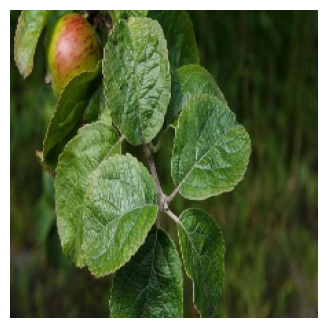

In [28]:
img = cv2.imread('./Apple/app.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (224,224), interpolation = cv2.INTER_LINEAR)
plt.figure(figsize=(4, 4))
plt.imshow(img_rgb)
plt.axis('off')
test_img = preprocess_input(img_rgb)
probs = model.predict(np.expand_dims(test_img, axis=0))
for idx in probs.argsort()[0][::-1][:3]:
    print("{:.2f}%".format(probs[0][idx]*100), "\t", labels[idx])

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 427ms/step
Confusion Matrix
Normalized confusion matrix
Classification Report
                  precision    recall  f1-score   support

      Apple scab       0.97      0.92      0.94       126
       Black rot       0.96      0.98      0.97       125
Cedar apple rust       0.93      0.95      0.94        55
         Healthy       0.96      0.98      0.97       194

        accuracy                           0.96       500
       macro avg       0.96      0.96      0.96       500
    weighted avg       0.96      0.96      0.96       500



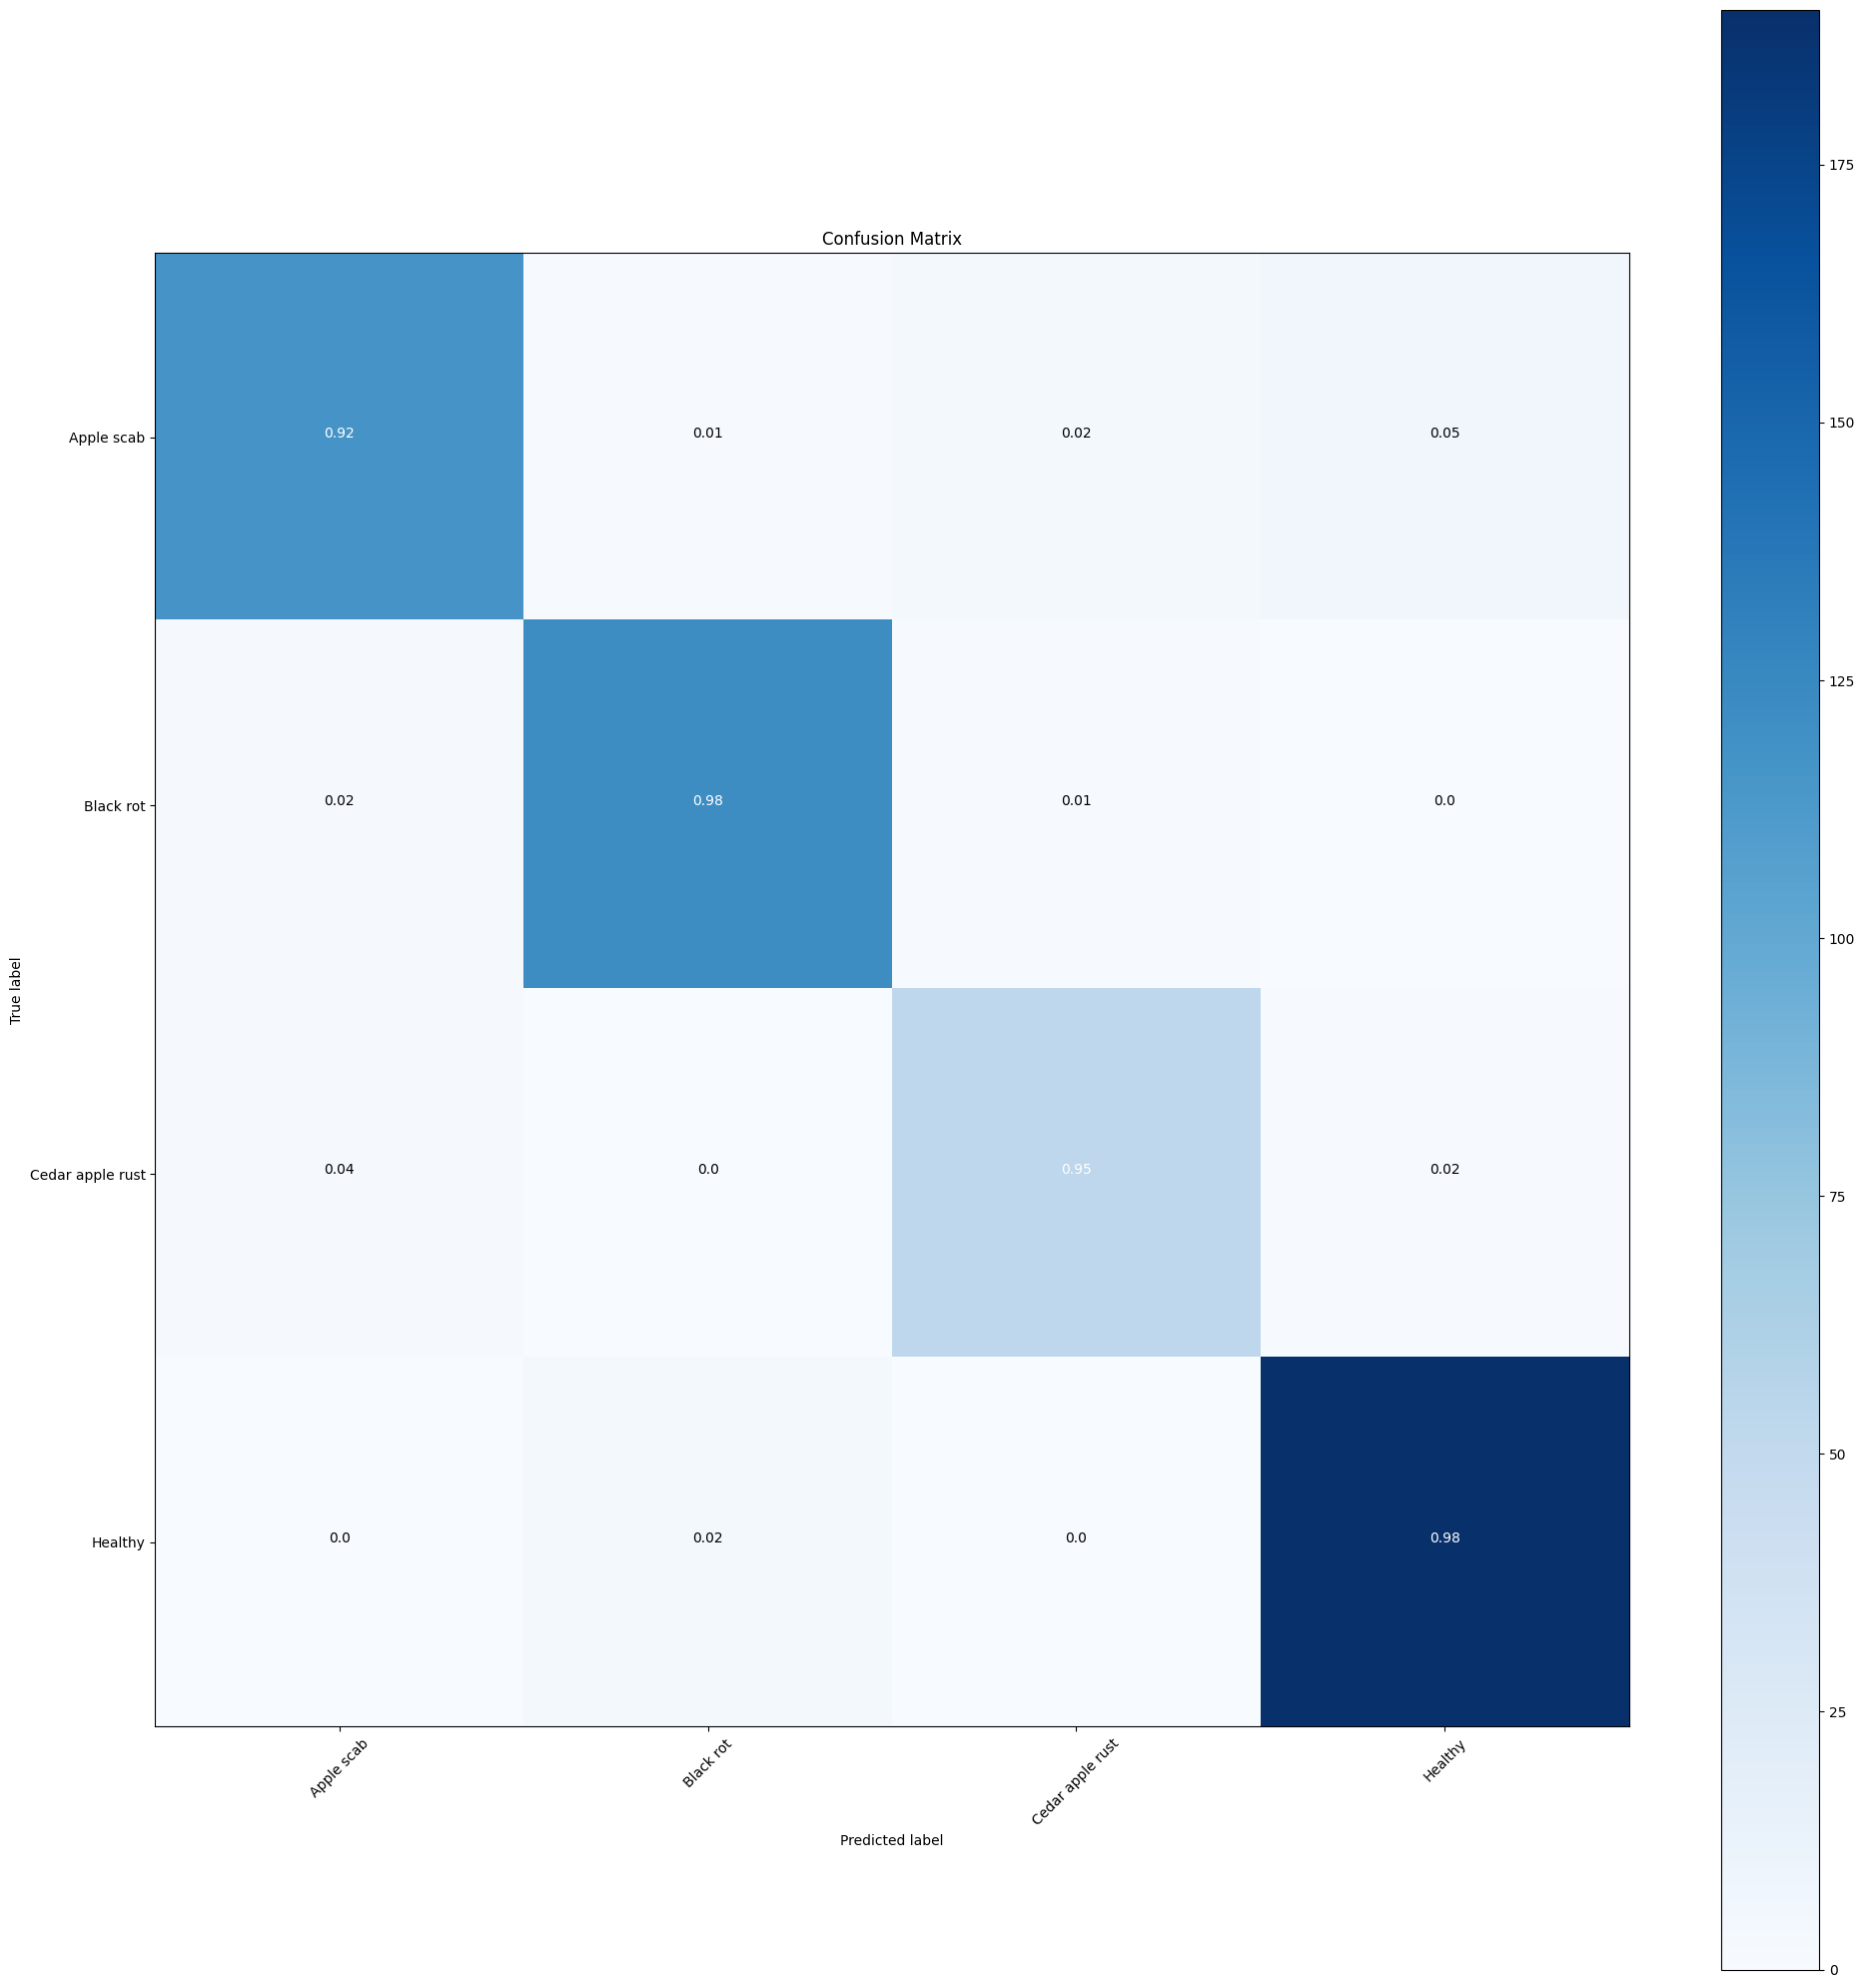

In [16]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in train_images.class_indices:
    target_names.append(key)

# print(target_names)
#Confution Matrix
Y_pred = model.predict(test_images)
# y_pred = (Y_pred>0.5).astype(int)
# y_pred = np.where(Y_pred >0.5, 1,0)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_images.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_images.classes, y_pred, target_names=target_names))